Download the demo data from figshare.
The dataset contains 381 cells,which include COLO320DM cells, GM12878 cells and K562 cells.
Update the file path in the relevant JSON file based on the location where the file was downloaded.

In [ ]:
# Import the package and configure the path.
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from Wrapper import *
config = "./config.JSON"
model = DeepNanoHiC(config)

In [ ]:
# Process data
model.process_data()

In [ ]:
#Preparation of the model
model.prep_model()


In [ ]:
# Training
model.train_for_embeddings()

In [ ]:
model.train_for_imputation_nbr_0()
model.impute_no_nbr()

In [ ]:
model.train_for_imputation_with_nbr()
model.impute_with_nbr()

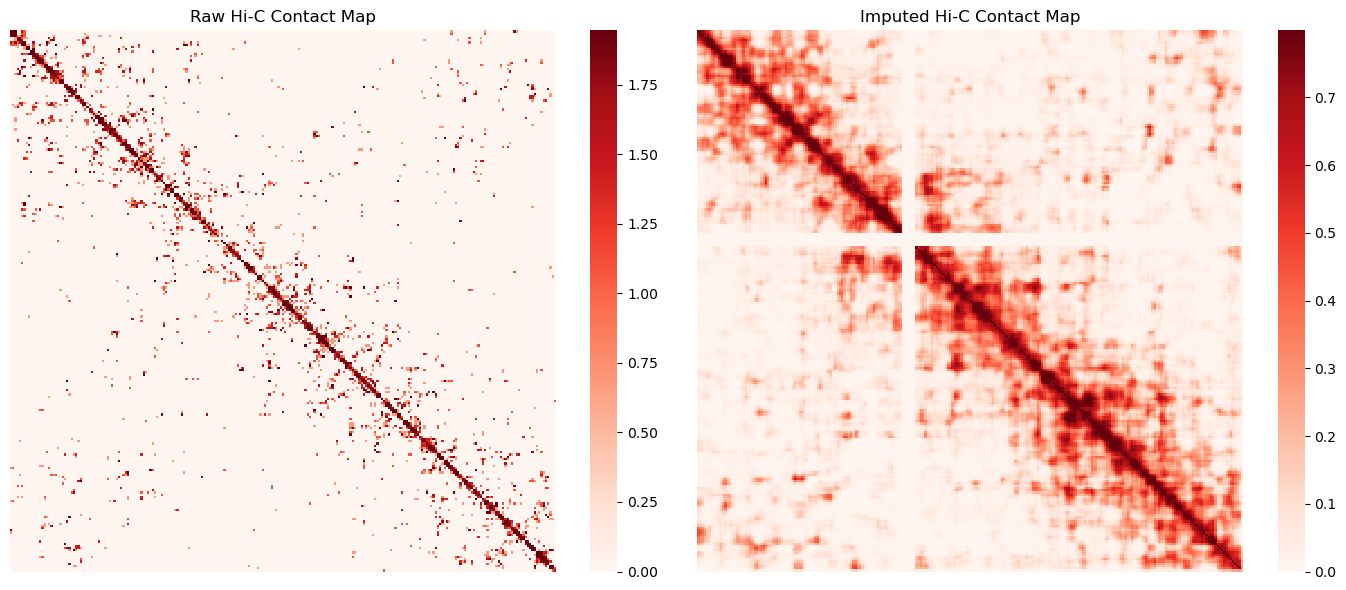

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw, _, imp = model.fetch_map("chr2",110)
raw_plot_data = np.log1p(raw.toarray())
imp_plot_data = np.log1p(imp.toarray())

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Raw Hi-C Contact Map
sns.heatmap(raw_plot_data, cmap="Reds", vmax=np.percentile(raw_plot_data, 99), ax=axes[0])
axes[0].set_title("Raw Hi-C Contact Map")
axes[0].axis("off")  

# Imputed Hi-C Contact Map
sns.heatmap(imp_plot_data, cmap="Reds", vmax=np.percentile(imp_plot_data, 99), ax=axes[1])
axes[1].set_title("Imputed Hi-C Contact Map")
axes[1].axis("off") 


plt.tight_layout()
plt.show()
